In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container
from project_utils.acq_data_capture import Acq_Data
from project_utils.surroagte_gp     import Surrogate_GP



Num_Points = 1


(1000,)


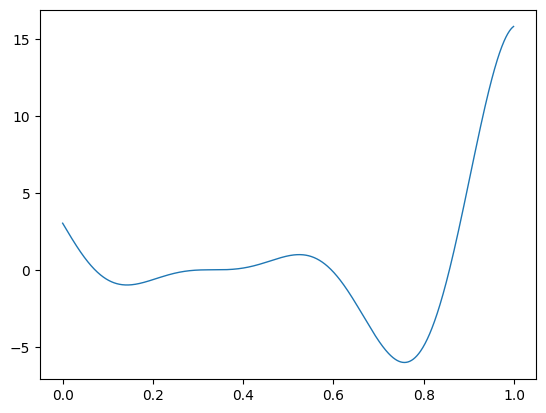

(1000, 1)


In [2]:
# Load Forrester model

Forrester_Data = BB_Model('Forrester')

#Forrester_Data.df().head()

In [3]:
Forrester_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.22072011138369796


MLPRegressor(random_state=RandomState(MT19937) at 0x1C3CE759840)

In [4]:
Forrester_Data.Random_Forest()

0.9999372961341442


RandomForestRegressor(random_state=RandomState(MT19937) at 0x1C3CE759840)

In [5]:
Forrester_Data.GP()

0.9938219542108491


GaussianProcessRegressor()

In [6]:
print(Forrester_Data.get_features())

['X']


In [7]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()

#Initializing the explainer object
Unravel_Exp = UnRAVELTabularExplainer(bbox_model           = Forrester_Data.get_GP(),
                                      train_data           = X_train,
                                      categorical_features = Forrester_Data.get_catagorical(),
                                      mode                 = Forrester_Data.get_mode())

sur_GP = Surrogate_GP()


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [8]:
#Default settings
#from unravel_2.ur_model import UR_Model

#X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()


##Initializing the explainer object
#Unravel_Exp = UR_Model(bbox_model           = Forrester_Data.get_Random_Forest(),
#                       train_data           = X_train,
#                       categorical_features = Forrester_Data.get_catagorical(),
#                       mode                 = Forrester_Data.get_mode())       


In [9]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [0.50399375]
Std 0:  [0.29029619]


In [10]:
#for i in range(5):
#    print(X_test[i,:])

In [11]:
#from matplotlib import pyplot
#pyplot.boxplot(x=X_test)
#pyplot.show()

In [12]:
# Generate explantion data for Random Forest

Forrester_Stats = Feature_Statistics(feature_names = Forrester_Data.get_features(), mode = Forrester_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
#    data_row  = np.array([X_test[test_instance]])
    data_row  = np.array([0.4])
    
    #scores, acq_data = Unravel_Exp.explain(X_init            = data_row.reshape(1, -1),
    scores = Unravel_Exp.explain(X_init            = data_row.reshape(1, -1),
                                           feature_names     = Forrester_Data.get_features(),
                                           alpha             = "FUR_W",
                                           max_iter          = 20,
                                           normalize         = False,
                                           interval          = 1,
                                           importance_method = "ARD")
       
    f_predict = Forrester_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    #e_predict = Unravel_Exp.gpmodel_predict(data_row)
    #e_predict = np.array(e_predict).ravel()
    
    acq_data = Unravel_Exp.get_acq_data()
    
    X, y = Unravel_Exp.get_surrogate_data()

    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(Unravel_Exp.get_surrogate_data())

    print(f_predict, e_predict)
    
    Forrester_Stats.Add_Sample(sample_scores = scores,
                               outcome       = y_test[test_instance],
                               X_row         = data_row,
                               f_prediction  = f_predict,
                               e_prediction  = e_predict.ravel(),
                               feopt         = acq_data.get_fe_x0(),
                               model         = Unravel_Exp.get_gpmodel())


INSTANCE:  0
RANDOM
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main
ACQ Main

In [13]:
import matplotlib.pyplot as plt


In [14]:
print(f_predict)
print(e_predict)


[0.11495794]
[4.30572510e-01 9.99998376e-06]


In [15]:
Forrester_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           12.188355891657972  :  0.0  :  12.188355891657972
y - exp(x):          11.872741321836648  :  0.0  :  11.872741321836648
BB(x) - exp(x):      0.3156145698213245  :  0.0  :  0.3156145698213245
Average exp(x) var:  9.999983760343299e-06


In [16]:
#Forrester_Stats.Jaccard_Values()

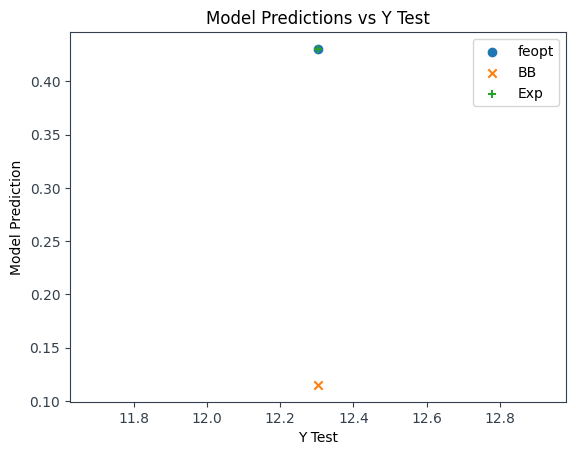

In [17]:
Forrester_Stats.Reg_Fidelity_Graph()

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF

X, y = Unravel_Exp.get_surrogate_data()
kernel = Matern()

GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer = 10, optimizer='fmin_l_bfgs_b', normalize_y = False, copy_X_train=True)
GP.fit(X, y)
        
print(y[0])
fe = GP.predict(X[0].reshape(1,-1))
print(fe)
ey = Unravel_Exp.gpmodel_predict(X[0].reshape(1,-1))
print(ey)


[0.43057251]
[0.43057251]
(array([[0.63125537]]), array([[6.18822928e-05]]))


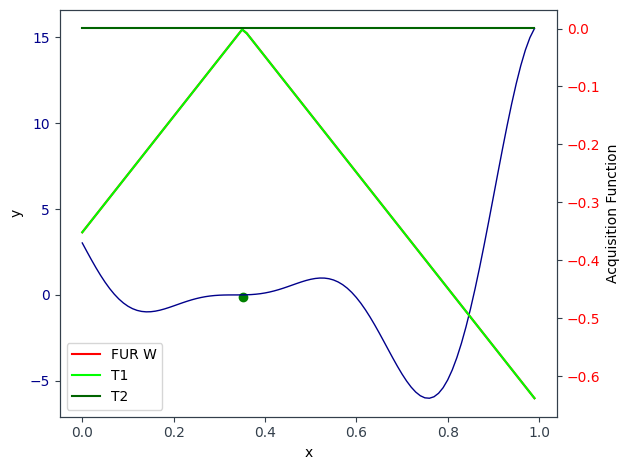

In [19]:
acq_data.plot_point()

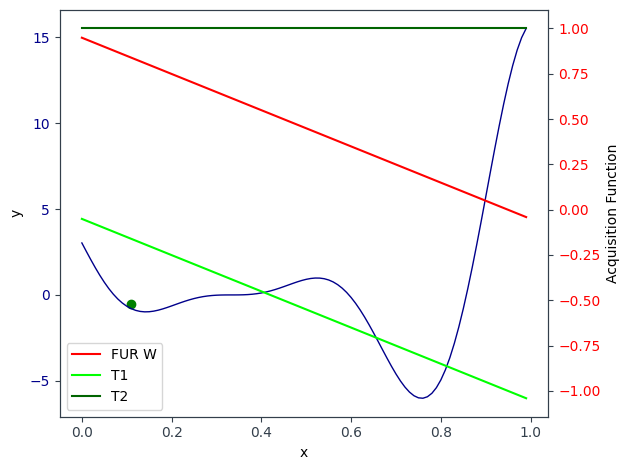

In [20]:
acq_data.plot_point(1)

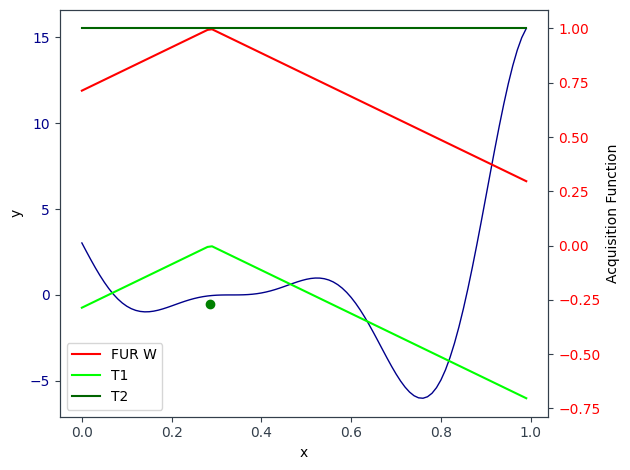

In [21]:
acq_data.plot_point(2)

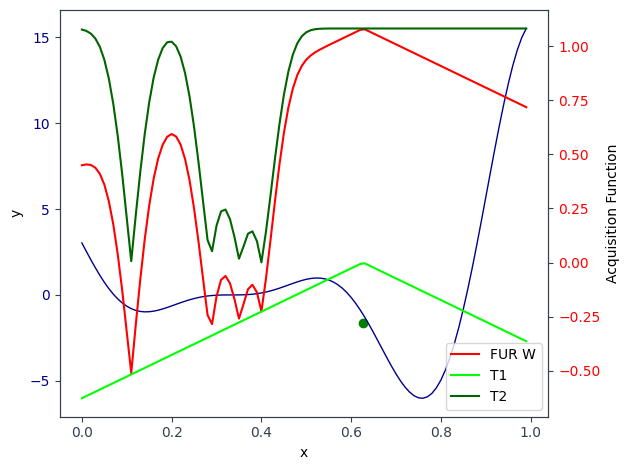

In [22]:
acq_data.plot_point(3)

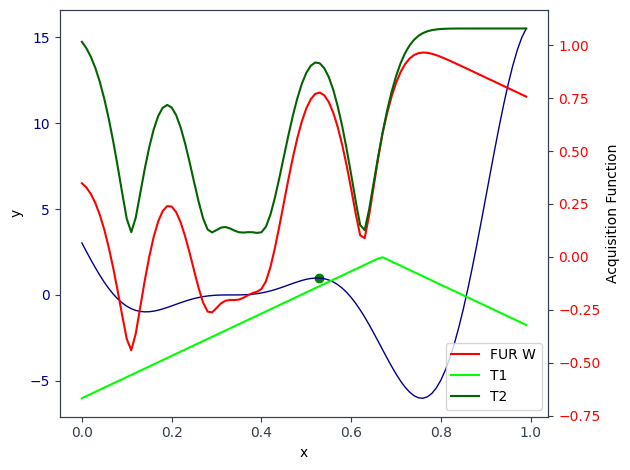

In [23]:
acq_data.plot_point(4)

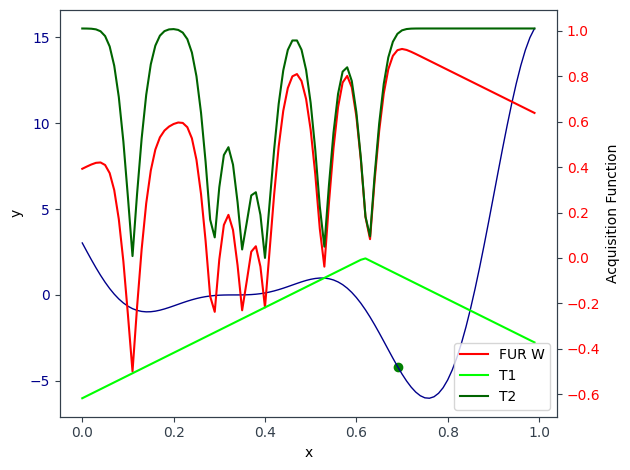

In [24]:
acq_data.plot_point(5)

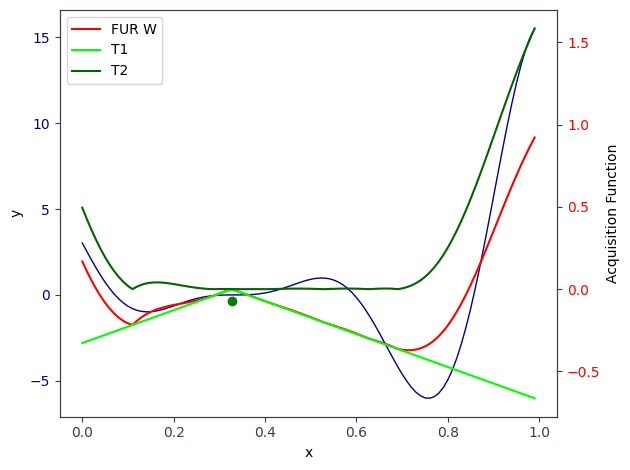

In [25]:
acq_data.plot_point(6)

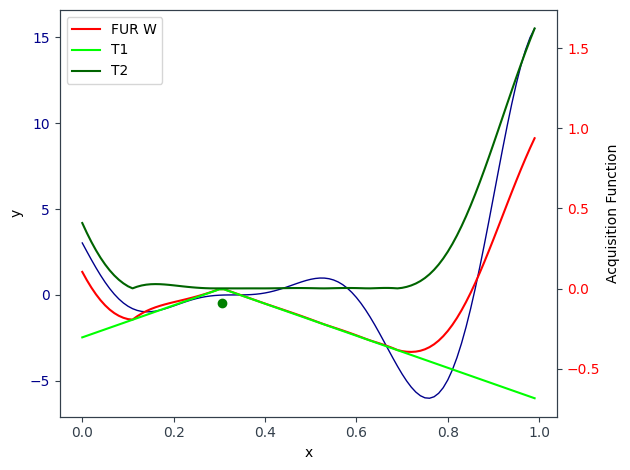

In [26]:
acq_data.plot_point(7)

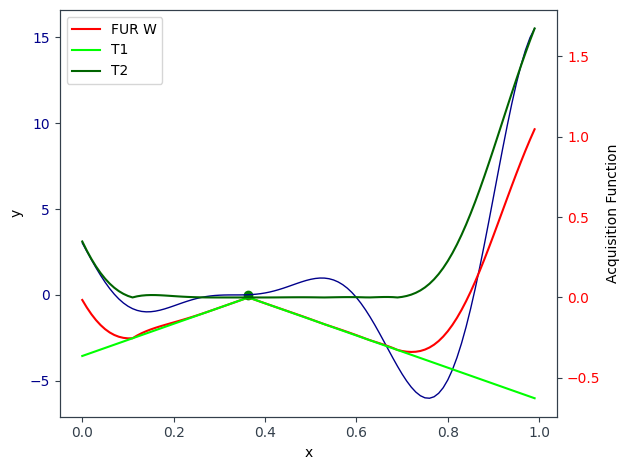

In [27]:
acq_data.plot_point(8)

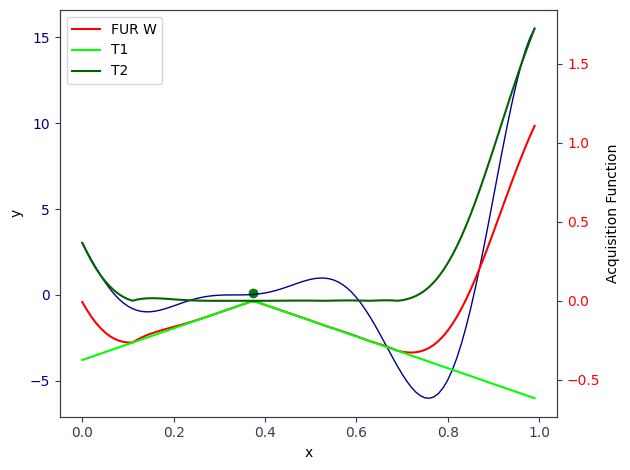

In [28]:
acq_data.plot_point(9)

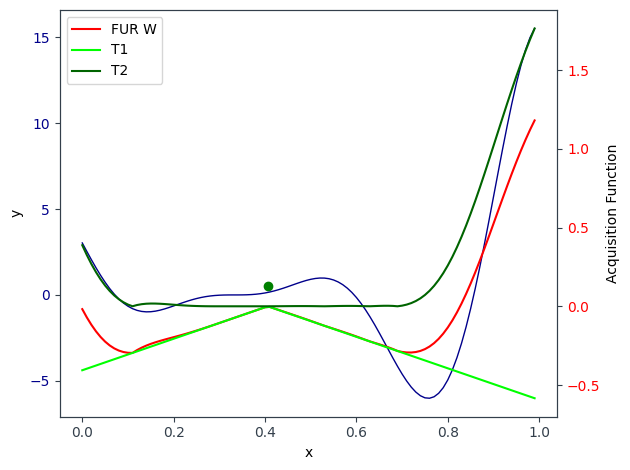

In [29]:
acq_data.plot_point(10)

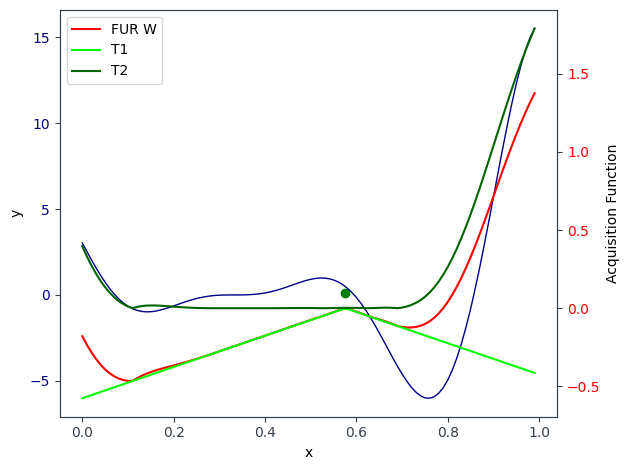

In [30]:
acq_data.plot_point(11)

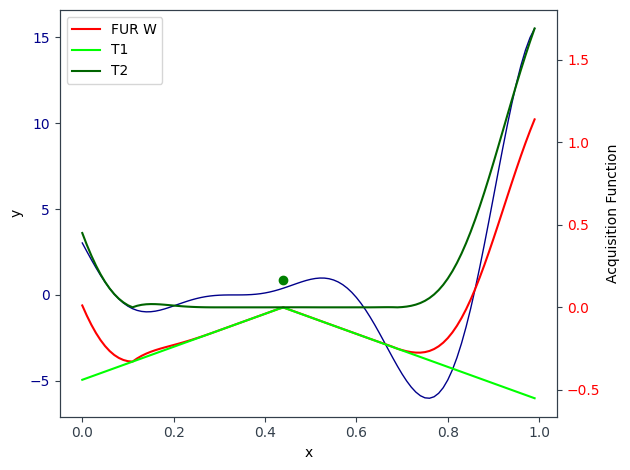

In [31]:
acq_data.plot_point(12)

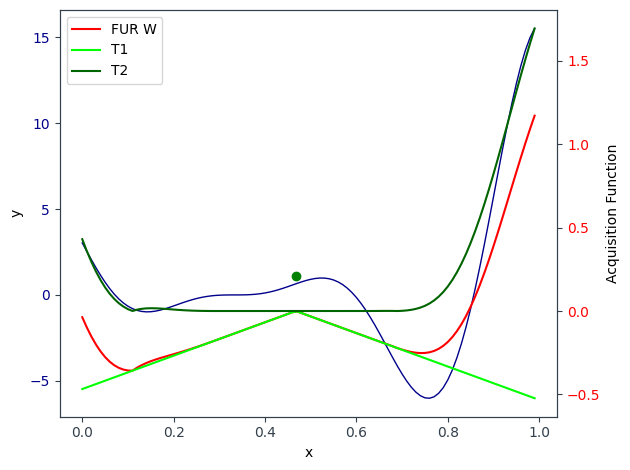

In [32]:
acq_data.plot_point(13)

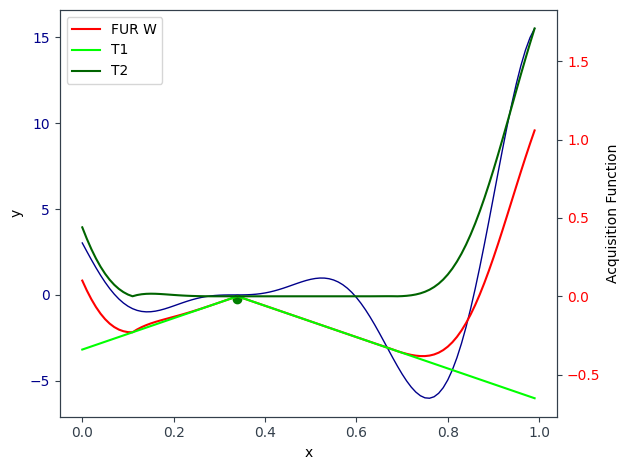

In [33]:
acq_data.plot_point(14)

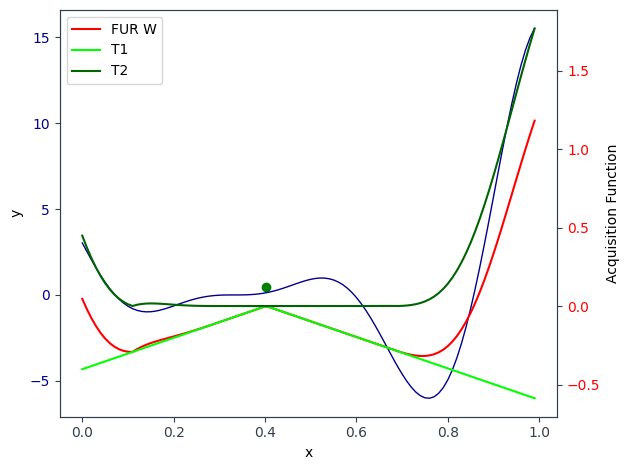

In [34]:
acq_data.plot_point(15)

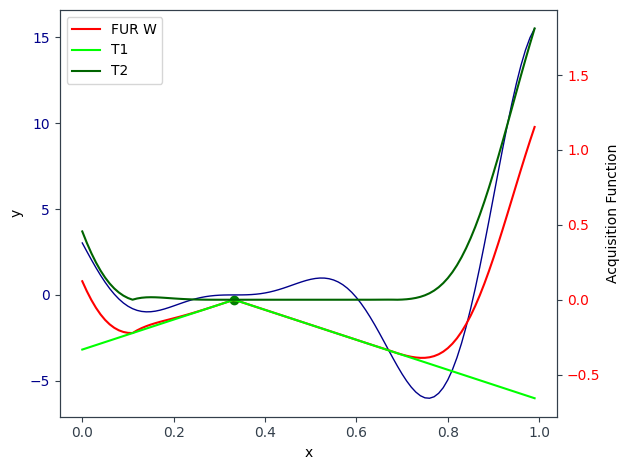

In [35]:
acq_data.plot_point(16)

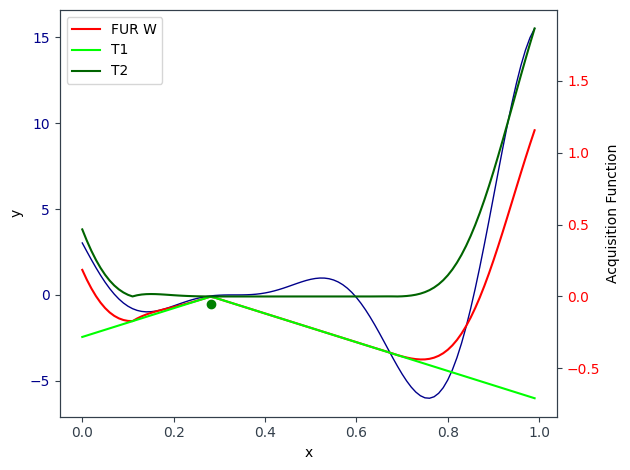

In [36]:
acq_data.plot_point(17)

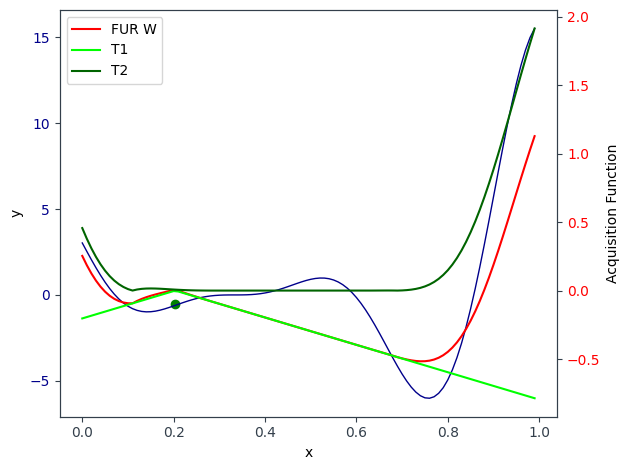

In [37]:
acq_data.plot_point(18)

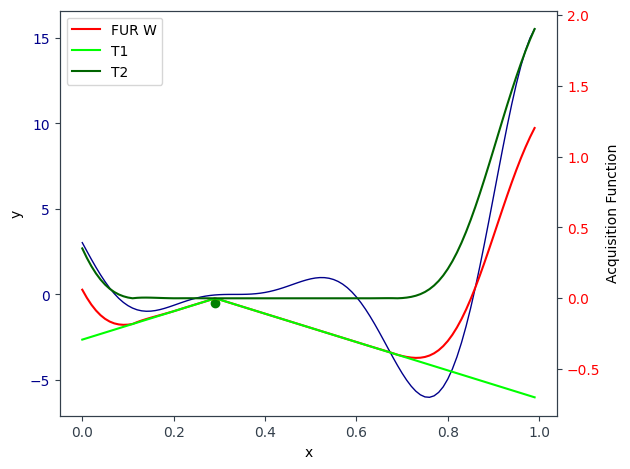

In [38]:
acq_data.plot_point(19)

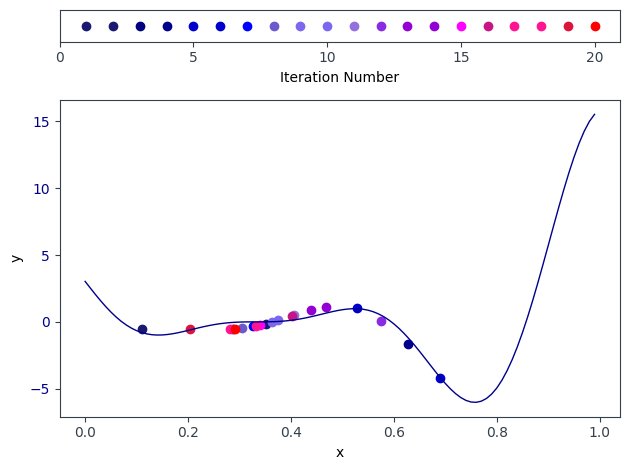

In [39]:
acq_data.plot_all()